<a href="https://colab.research.google.com/github/sruthidamera/cs666student/blob/main/CS666_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

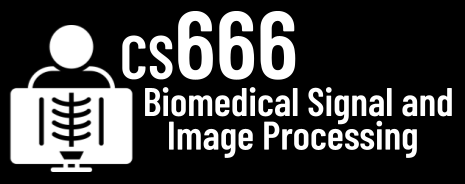
#Assignment 4

In [ ]:
# NAME: Sruthi Damera

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.2 MB/s eta 0:00:00


In [ ]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs666.org/data/xray/ with the wget command!
# Note: Please use the forwarded dropbox link and change dl=0 to dl=1!
# This is a subset of the Kaggle Pneumonia + Covid Datasets!

In [24]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('/content/xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [25]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!

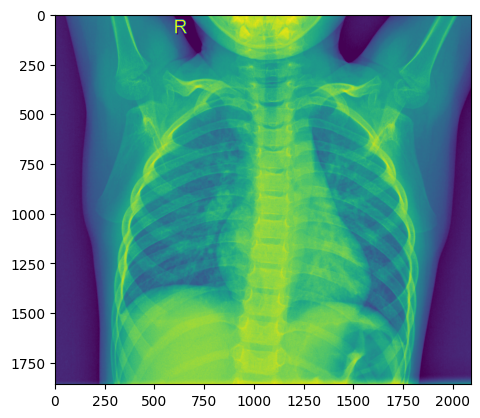

In [26]:
# TODO: YOUR CODE
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(img)

In [28]:
print(img.shape)

(1858, 2090)


**Task 2:** Let's do some data wrangling and more visualization! [30 Points]

In [29]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [30]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) Organize and load the image data from three directories into a numpy array named 'data'.
# TODO: Operation 2) Convert images to grayscale using 'rgb2gray' and resize them to a size of (300, 300) using 'imresize'.
# TODO: Operation 3) Assign the processed images to specific locations in the numpy array.

In [31]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

<ipython-input-32-453f385d17a7>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)


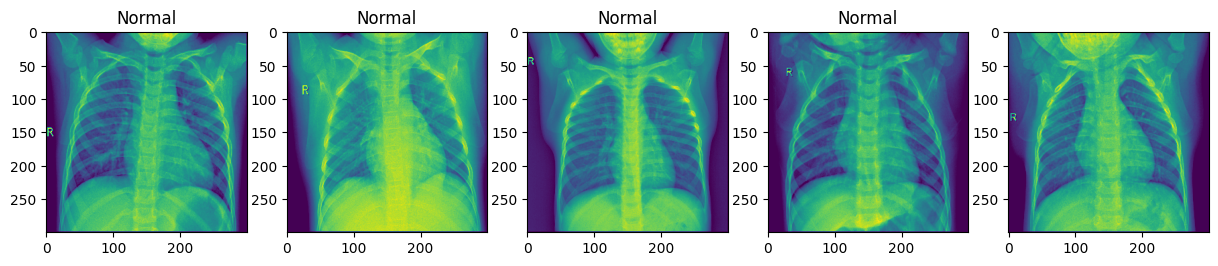

In [32]:
# TODO: YOUR CODE
plt.figure(figsize=(15,15))
for i in range(5):
  plt.title('Normal')
  plt.subplot(2,5,i+1)
  plt.imshow(data[0][i])

**Task 3:** Setup training and testing data. [15 Points]

In [33]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [34]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [35]:
# TODO: Please create the y_train vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_train = np.zeros(TRAINING_COUNT * 3)
y_train[TRAINING_COUNT:TRAINING_COUNT*2]= 1
y_train[TRAINING_COUNT*2:TRAINING_COUNT*3]= 2

In [40]:
print(y_train)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [38]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [39]:
# TODO: Please create the y_test vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_test = np.zeros(TESTING_COUNT * 3)
y_test[TESTING_COUNT:TESTING_COUNT*2]=1
y_test[TESTING_COUNT*2:TESTING_COUNT*3]=2

In [41]:
print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


**Task 4:** Let's train and evaluate the Random Forest! [30 Points]

In [42]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [43]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [44]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [60]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [45]:
# TODO: YOUR ANSWER
# The Random Forest algorithm, a type of supervised machine learning, constructs numerous decision trees.
# These trees individually learn from randomly selected subsets of the data and aggregate their predictions to make final classifications.
# Utilizing Random Forest, we train multiple decision trees on different subsets of the data, later combining their outputs to predict whether an image depicts a normal condition, pneumonia, or covid.
# Random Forest, an algorithm within the realm of supervised machine learning, builds multiple decision trees.
# These trees, each trained on distinct subsets of the data, collectively contribute to predictions by combining their results.
# Employing Random Forest, we train numerous decision trees on varied subsets of the data, merging their predictions to discern whether an image represents a normal state, pneumonia, or covid.

In [46]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

0.8916666666666667

In [61]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [47]:
# TODO: Getting 0.89 is really good. We might get better results if we train it with greater data size.

**Task 5:** Now, let's decrease the number of trees! [10 Points]

In [62]:
# How many trees are used in Task 4?

In [49]:
# TODO: YOUR ANSWER
num_trees = clf.n_estimators
print("Number of trees used:", num_trees)

Number of trees used: 100


In [51]:
# Now, please use a single tree and observe the testing performance.

In [52]:
# TODO: YOUR CODE
clf_single_tree = RandomForestClassifier(n_estimators=1)
fitted_single_tree = clf_single_tree.fit(X_train, y_train)

In [53]:
clf_single_tree.score(X_test, y_test)

0.7083333333333334

In [55]:
# Are you surprised?

In [54]:
# TODO: YOUR ANSWER
# Yes, the accuracy is gradually decreased since we used a single decision tree to train the model.

**Bonus:** Let's take a closer look! [33 Points]

In [63]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [57]:
# TODO: YOUR CODE AND YOUR ANSWER
COVID_test_count= 99
X_COVID = np.zeros( (COVID_test_count, 300*300 ), dtype=np.float32)
t_pos = 0
for image in data[2][100:199]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_COVID[t_pos] = image
    t_pos += 1
y_COVID = np.full(COVID_test_count, 2)
clf.score(X_COVID, y_COVID)


0.8888888888888888

In [64]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(X_test_covid_only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [58]:
labels = clf.predict(X_COVID)
misclassified_indices = np.where(labels!=y_COVID)[0]
print("Number of misclassified samples:",len(misclassified_indices))
print("Indices of Misclassified samples:",misclassified_indices)

Number of misclassified samples: 11
Indices of Misclassified samples: [ 3  5 11 16 26 35 42 47 53 61 81]


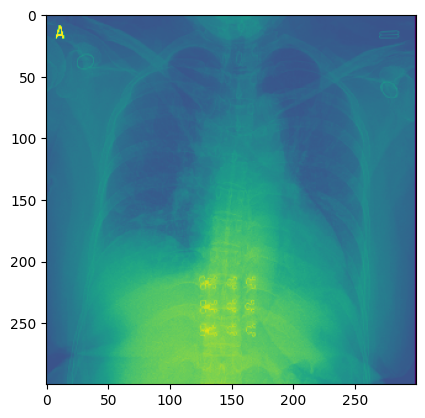

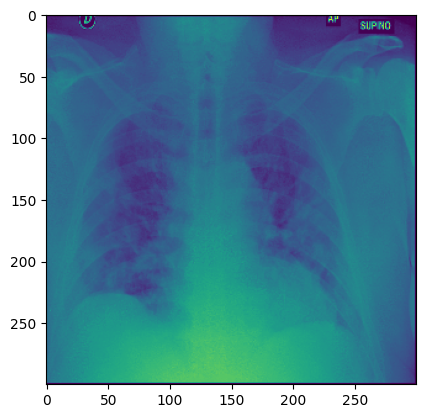

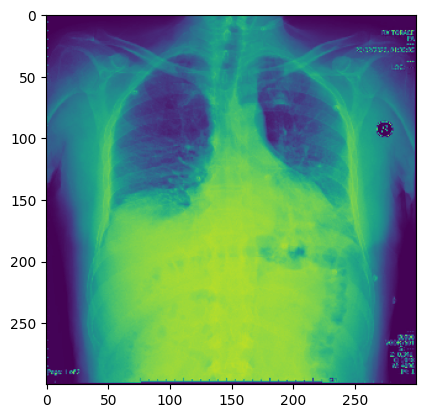

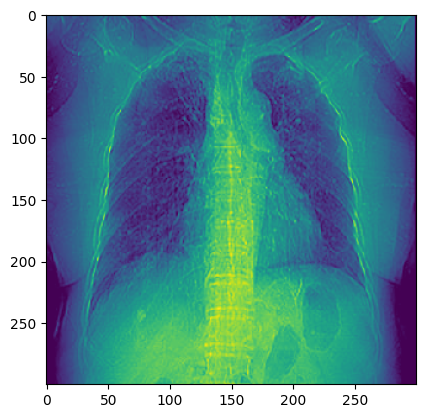

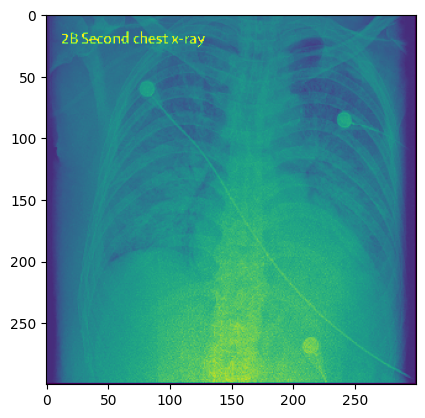

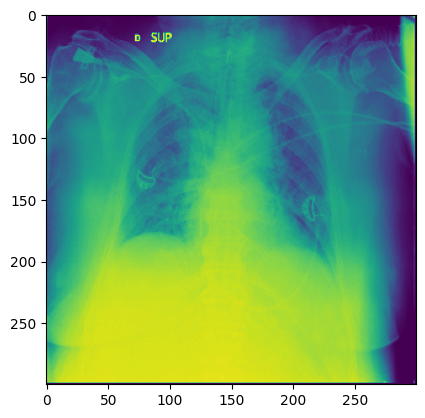

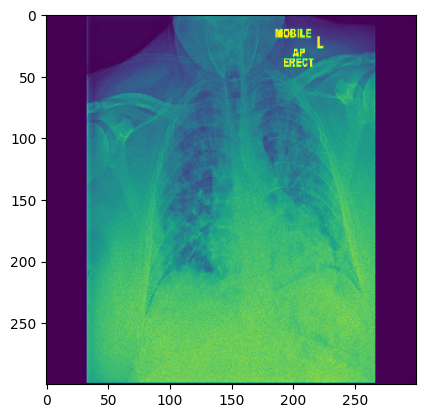

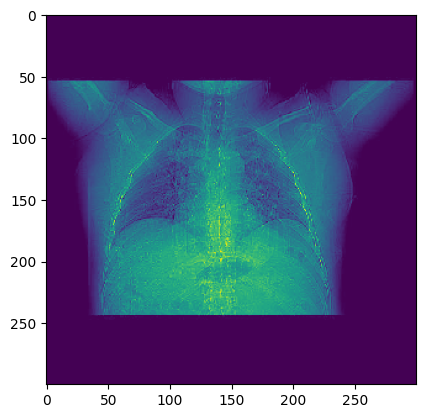

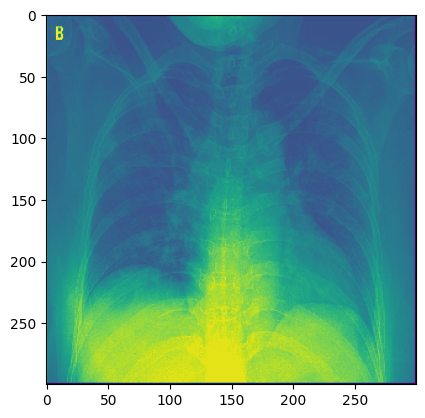

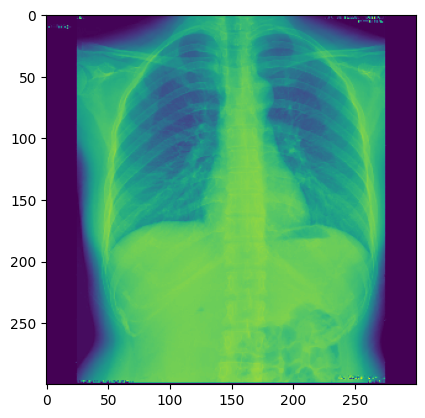

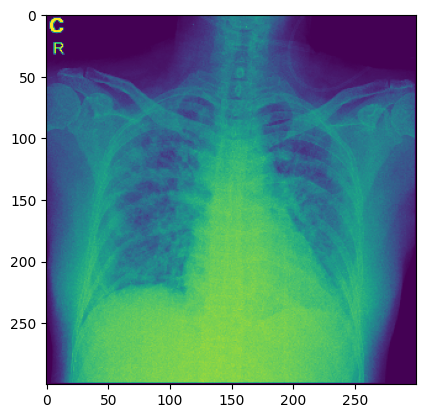

In [59]:
misclassified_images = X_COVID[misclassified_indices]
for i in range(len(misclassified_images)):
    plt.imshow(misclassified_images[i].reshape(300,300))
    plt.show()

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw